In [1]:
##The data below has been imported from the COVID 19 Stateiwse daily patient database from the source:https://api.covid19india.org/csv/latest/state_wise_daily.csv

#Both data sources have a live count of the number of confirmed,deceased and recovered cases in the states in India
#The code takes these numbers,computes the recovery and death ratios  and plots graphs for the same.
#The graphs from this code is put up on my website @ https://sites.google.com/site/sohamdasgupta04
import matplotlib
import lmfit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel, ExponentialModel, PowerLawModel
from numpy import linspace
plt.close('all')
from pprint import pprint
from datetime import timedelta, date

In [2]:
last_k = 1
df_us = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df_india = pd.read_csv("state_wise_new.csv")
state = 'GJ'

In [3]:
df_india

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,16-Apr-20,Recovered,258,1,0,0,3,8,0,6,...,0,2,17,0,62,68,0,11,0,5
101,16-Apr-20,Deceased,26,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2,0,3
102,17-Apr-20,Confirmed,922,1,38,0,0,2,0,0,...,0,14,98,0,56,66,0,44,3,24
103,17-Apr-20,Recovered,273,0,15,0,4,0,0,1,...,0,1,19,0,103,0,0,14,0,9


In [4]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 3, 10)
end_dt = date(2020, 4, 11)
analysis_dates = []
for dt in daterange(start_dt, end_dt):
    analysis_dates.append(dt.strftime("%Y-%m-%d"))

In [5]:
df_india

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,16-Apr-20,Recovered,258,1,0,0,3,8,0,6,...,0,2,17,0,62,68,0,11,0,5
101,16-Apr-20,Deceased,26,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2,0,3
102,17-Apr-20,Confirmed,922,1,38,0,0,2,0,0,...,0,14,98,0,56,66,0,44,3,24
103,17-Apr-20,Recovered,273,0,15,0,4,0,0,1,...,0,1,19,0,103,0,0,14,0,9


In [6]:
df_india_e = df_india[df_india.Status == "Confirmed"]
ind_confirmed = df_india_e.reset_index()
ind_confirmed

,index,Date,Status,TT,AN,AP,AR,AS,BR,CH,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
1,3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
2,6,16-Mar-20,Confirmed,15,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,9,17-Mar-20,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,1
4,12,18-Mar-20,Confirmed,37,0,0,0,0,0,0,...,0,1,3,0,1,8,0,2,1,0
5,15,19-Mar-20,Confirmed,27,0,2,0,0,0,1,...,0,0,2,0,1,3,0,3,1,0
6,18,20-Mar-20,Confirmed,58,0,0,0,0,0,4,...,0,1,8,0,0,3,0,4,0,1
7,21,21-Mar-20,Confirmed,78,0,2,0,0,0,0,...,0,10,7,0,3,2,0,4,0,2
8,24,22-Mar-20,Confirmed,67,0,1,0,0,2,1,...,0,8,4,0,3,6,0,2,0,3
9,27,23-Mar-20,Confirmed,102,0,1,0,0,1,1,...,0,2,4,0,3,6,0,2,1,0


In [7]:
df_india_f = df_india[df_india.Status == "Deceased"]
ind_deceased = df_india_f.reset_index()
ind_deceased

,index,Date,Status,TT,AN,AP,AR,AS,BR,CH,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,2,14-Mar-20,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,15-Mar-20,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,16-Mar-20,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,17-Mar-20,Deceased,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,18-Mar-20,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,17,19-Mar-20,Deceased,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,20,20-Mar-20,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,23,21-Mar-20,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,26,22-Mar-20,Deceased,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,29,23-Mar-20,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df_india_j = df_india[df_india.Status == "Recovered"]
ind_recovered = df_india_j.reset_index()
ind_recovered

,index,Date,Status,TT,AN,AP,AR,AS,BR,CH,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,1,14-Mar-20,Recovered,9,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
1,4,15-Mar-20,Recovered,4,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
2,7,16-Mar-20,Recovered,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,10,17-Mar-20,Recovered,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,13,18-Mar-20,Recovered,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,16,19-Mar-20,Recovered,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
6,19,20-Mar-20,Recovered,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,21-Mar-20,Recovered,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,25,22-Mar-20,Recovered,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,28,23-Mar-20,Recovered,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:

ind_state=pd.DataFrame()

ind_state['confirmed']=ind_confirmed[state]
ind_state['state']=state
ind_state['deceased']=ind_deceased[state]
ind_state['recovered']=ind_recovered[state]

ind_total=pd.DataFrame()
ind_total['confirmed']=ind_state['confirmed'].cumsum()
ind_total['state']=state
ind_total['recovered']=ind_state['recovered'].cumsum()
ind_total['deceased']=ind_state['deceased'].cumsum()
ind_total['r/c']=(ind_total['recovered']/ind_total['confirmed'])
ind_total['d/c']=(ind_total['deceased']/ind_total['confirmed'])
ind_total['recovered/confirmed']=ind_total['r/c'].rolling(7).mean()

ind_total['deaths/confirmed']=ind_total['d/c'].rolling(7).mean()


ind_state


,confirmed,state,deceased,recovered
0,0,GJ,0,0
1,0,GJ,0,0
2,0,GJ,0,0
3,0,GJ,0,0
4,0,GJ,0,0
5,2,GJ,0,0
6,5,GJ,0,0
7,7,GJ,0,0
8,4,GJ,1,0
9,12,GJ,0,0


In [10]:

ind=pd.DataFrame()

ind['confirmed']=ind_confirmed['TT']
ind['country']="India"
ind['deceased']=ind_deceased['TT']
ind['recovered']=ind_recovered['TT']

ind_tt=pd.DataFrame()
ind_tt['confirmed']=ind['confirmed'].cumsum()
ind_tt['country']="India"
ind_tt['recovered']=ind['recovered'].cumsum()
ind_tt['deceased']=ind['deceased'].cumsum()
ind_tt['r/c']=(ind_tt['recovered']/ind_tt['confirmed'])
ind_tt['d/c']=(ind_tt['deceased']/ind_tt['confirmed'])
ind_tt['recovered/confirmed']=ind_tt['r/c'].rolling(7).mean()

ind_tt['deaths/confirmed']=ind_tt['d/c'].rolling(7).mean()


ind


,confirmed,country,deceased,recovered
0,81,India,2,9
1,27,India,0,4
2,15,India,0,1
3,11,India,1,1
4,37,India,0,0
5,27,India,1,5
6,58,India,0,3
7,78,India,0,0
8,67,India,3,0
9,102,India,2,12


In [11]:
ind_total

,confirmed,state,recovered,deceased,r/c,d/c,recovered/confirmed,deaths/confirmed
0,0,GJ,0,0,NaN,NaN,NaN,NaN
1,0,GJ,0,0,NaN,NaN,NaN,NaN
2,0,GJ,0,0,NaN,NaN,NaN,NaN
3,0,GJ,0,0,NaN,NaN,NaN,NaN
4,0,GJ,0,0,NaN,NaN,NaN,NaN
5,2,GJ,0,0,0.000000,0.000000,NaN,NaN
6,7,GJ,0,0,0.000000,0.000000,NaN,NaN
7,14,GJ,0,0,0.000000,0.000000,NaN,NaN
8,18,GJ,0,1,0.000000,0.055556,NaN,NaN
9,30,GJ,0,1,0.000000,0.033333,NaN,NaN


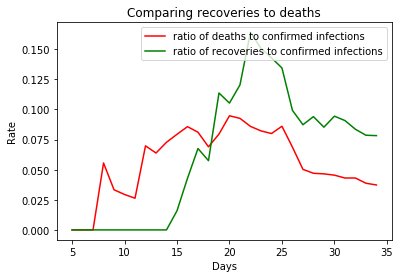

In [12]:
ax = plt.gca()
ind_total.plot(y='d/c', kind = 'line',label = 'ratio of deaths to confirmed infections',color='red', ax=ax)
ind_total.plot(y='r/c', kind = 'line',label = 'ratio of recoveries to confirmed infections',color='green',ax=ax) 
plt.title('Comparing recoveries to deaths')
plt.xlabel('Days')
plt.ylabel('Rate')
plt.savefig("hello_MH.jpeg")
plt.show()

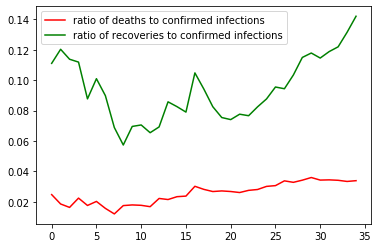

In [13]:
ax = plt.gca()
ind_tt.plot(y='d/c', kind = 'line',label = 'ratio of deaths to confirmed infections',color='red', ax=ax)
ind_tt.plot(y='r/c', kind = 'line',label = 'ratio of recoveries to confirmed infections',color='green',ax=ax) 
plt.savefig("INDIA.jpeg")

plt.show()

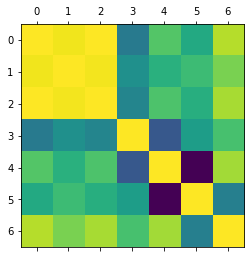

In [14]:
plt.matshow(ind_tt.corr())
plt.show()